In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] = 'D2coding'
plt.rcParams['font.size'] = 9
plt.rcParams['axes.unicode_minus'] = False

In [79]:
KMRD_DATASET_PATH = '../../../kmrd-small/'

In [80]:
df_countries = pd.read_csv(KMRD_DATASET_PATH + 'countries.csv').dropna()

tmp = df_countries.groupby('country').size().reset_index(name='count').sort_values('count', ascending=False)

tmp.head(10)

,country,count
12,미국,654
22,영국,94
34,한국,94
32,프랑스,70
35,홍콩,51
25,이탈리아,43
9,독일(구 서독),20
23,오스트레일리아,12
6,대만,10
18,스페인,7


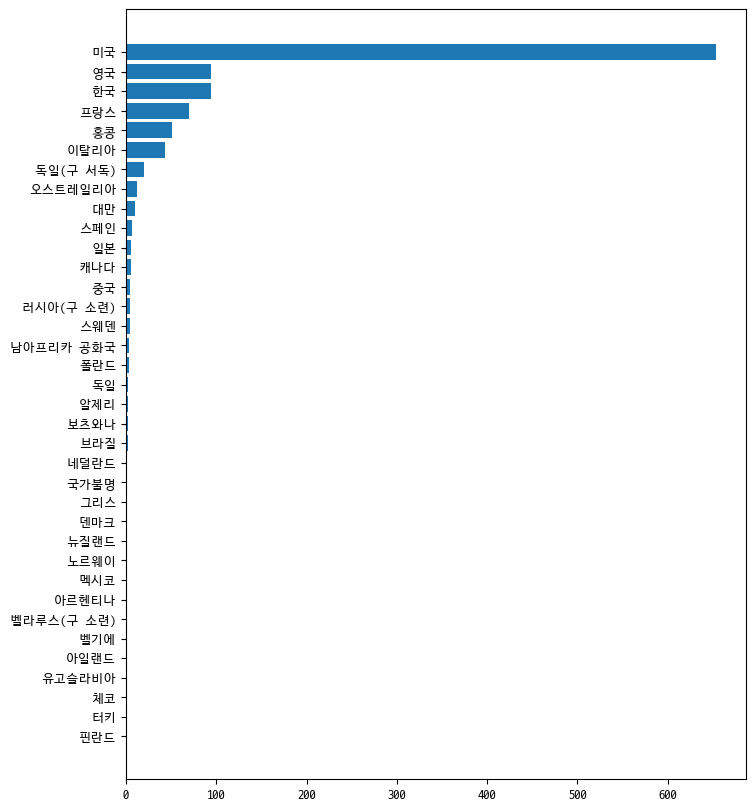

In [81]:
plt.figure(figsize=(8, 10))
plt.gca().invert_yaxis()
plt.barh(tmp['country'], tmp['count'])
plt.show()

In [82]:
df_castings = pd.read_csv(KMRD_DATASET_PATH + 'castings.csv').dropna()
df_people = pd.read_csv(KMRD_DATASET_PATH + 'peoples.txt', sep='\t').dropna()

df_leading = df_castings[df_castings['leading'] == 1]

tmp = df_castings.groupby('people').size().reset_index(name='count').sort_values('count', ascending=False)
tmp = pd.merge(tmp, df_people, on='people')

tmp.head(10)

,people,count,korean,original
0,1327,18,로버트 드 니로,Robert De Niro
1,1422,13,숀 코네리,Sean Connery
2,10649,11,데이빗 니븐,David Niven
3,290,11,클린트 이스트우드,Clint Eastwood
4,556,11,헨리 폰다,Henry Fonda
5,1507,11,실베스터 스탤론,Sylvester Stallone
6,2248,10,우마,Wu Ma
7,99,10,아놀드 슈왈제네거,Arnold Schwarzenegger
8,535,10,해리슨 포드,Harrison Ford
9,1336,10,로버트 레드포드,Robert Redford


In [83]:
df_leading = df_castings[df_castings['leading'] == 1]

tmp = df_leading.groupby('people').size().reset_index(name='count').sort_values('count', ascending=False)
tmp = pd.merge(tmp, df_people, on='people')

tmp.head(10)

,people,count,korean,original
0,1327,16,로버트 드 니로,Robert De Niro
1,1422,11,숀 코네리,Sean Connery
2,1507,11,실베스터 스탤론,Sylvester Stallone
3,290,11,클린트 이스트우드,Clint Eastwood
4,99,10,아놀드 슈왈제네거,Arnold Schwarzenegger
5,1336,10,로버트 레드포드,Robert Redford
6,556,10,헨리 폰다,Henry Fonda
7,1055,10,멜 깁슨,Mel Gibson
8,1248,10,피터 셀러스,Peter Sellers
9,535,10,해리슨 포드,Harrison Ford


In [84]:
df_non_leading = df_castings[df_castings['leading'] == 0]
tmp = df_non_leading.groupby('people').size().reset_index(name='count').sort_values('count', ascending=False)
tmp = pd.merge(tmp, df_people, on='people')

tmp.head(10)

,people,count,korean,original
0,2248,9,우마,Wu Ma
1,11042,6,워터 코에닉,Walter Koenig
2,11043,6,니셸 니콜스,Nichelle Nichols
3,11040,6,제임스 두한,James Doohan
4,11041,6,조지 타케이,George Hosato Takei
5,1539,6,토마스 밋첼,Thomas Mitchell
6,2331,6,로버트 로지아,Robert Loggia
7,4182,5,찰스 더닝,Charles Durning
8,3887,5,존 길구드,John Gielgud
9,5131,5,잭 워든,Jack Warden


In [85]:
df_castings = pd.read_csv(KMRD_DATASET_PATH + 'castings.csv').dropna()
df_people = pd.read_csv(KMRD_DATASET_PATH + 'peoples.txt', sep='\t').dropna()

df_leading = df_castings[df_castings['leading'] == 1]

tmp = df_castings.groupby('people').size().reset_index(name='count').sort_values('count', ascending=False)
tmp = pd.merge(tmp, df_people, on='people')

tmp.head(10)

,people,count,korean,original
0,1327,18,로버트 드 니로,Robert De Niro
1,1422,13,숀 코네리,Sean Connery
2,10649,11,데이빗 니븐,David Niven
3,290,11,클린트 이스트우드,Clint Eastwood
4,556,11,헨리 폰다,Henry Fonda
5,1507,11,실베스터 스탤론,Sylvester Stallone
6,2248,10,우마,Wu Ma
7,99,10,아놀드 슈왈제네거,Arnold Schwarzenegger
8,535,10,해리슨 포드,Harrison Ford
9,1336,10,로버트 레드포드,Robert Redford


In [98]:
df_castings = pd.read_csv(KMRD_DATASET_PATH + 'castings.csv').dropna()
df_people = pd.read_csv(KMRD_DATASET_PATH + 'peoples.txt', sep='\t').dropna()
df_rates = pd.read_csv(KMRD_DATASET_PATH + 'rates.csv').dropna()


df_rates = df_rates.groupby('movie').agg(
    rate_mean=('rate', 'mean'),
    rate_count=('rate', 'size')
).reset_index()

df_rates = df_rates[df_rates['rate_count'] >= 10]

df_leading = df_castings[df_castings['leading'] == 1]
df_leading = df_castings.groupby('people').size().reset_index(name='count').sort_values('count', ascending=False)
df_leading = df_leading[df_leading['count'] >= 5]

print(df_leading)


      people  count
402     1327     18
435     1422     13
541     1843     13
1881   10649     11
79       290     11
...      ...    ...
47       187      5
1629    8019      5
41       178      5
700     2631      5
693     2609      5

[185 rows x 2 columns]
